# Customer Churn Prediction at SyriaTel








## 1. Business Understanding

### Stakeholder Audience
The primary stakeholders for this project are customer retention and marketing teams at a telecommunications company, as well as customer service managers and senior leadership.

### Business Problem
Customer churn leads to lost revenue and increased costs associated with acquiring new customers. By identifying customers who are likely to churn before they leave, the business can prioritize outreach, improve customer service experiences, and design targeted retention offers.



## 2. Data Understanding

### Why This Dataset Is Appropriate
The dataset includes customer demographics, service plans, call usage behavior, and customer service interaction data. These variables are directly relevant to churn behavior, making the dataset well-suited for a supervised classification task focused on churn prediction.

### import packages, read_csv and create dataframe

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



In [365]:
# Loading the Dataset

df = pd.read_csv('../Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [366]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [367]:
df.shape

(3333, 21)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [369]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [370]:
df['churn'].value_counts()
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

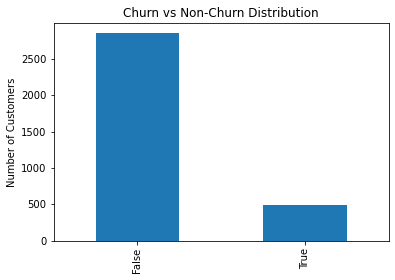

In [371]:
# Visualize the distribution of churn vs non-churn customers to assess class imbalance

df["churn"].value_counts().plot(kind="bar")
plt.title("Churn vs Non-Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()

## 3. Data Preparation

In [372]:
# Drop identifier column that does not carry predictive information
df = df.drop(columns=["phone number", "area code", "state"])
df.columns


Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [373]:
# Separate features and target variable
X = df.drop(columns=["churn"])
y = df["churn"]

X_original = X.copy()  # Keep a copy of original features for later analysis


In [374]:
X.shape, y.shape

((3333, 17), (3333,))

In [375]:
#Splitting data into Training and Test sets using stratify to ensure the same class distribution in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 


In [376]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


False    0.854573
True     0.145427
Name: churn, dtype: float64

In [377]:
# identifying feature types
categorical_features = X_train.select_dtypes(include=["object"]).columns
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns

categorical_features, numeric_features


(Index(['international plan', 'voice mail plan'], dtype='object'),
 Index(['account length', 'number vmail messages', 'total day minutes',
        'total day calls', 'total day charge', 'total eve minutes',
        'total eve calls', 'total eve charge', 'total night minutes',
        'total night calls', 'total night charge', 'total intl minutes',
        'total intl calls', 'total intl charge', 'customer service calls'],
       dtype='object'))

In [378]:
# Correlation matrix for numeric features to check for multicollinearity and understand relationships between features and target variable
numeric_features = X_train.select_dtypes(include=["int64", "float64"])

corr_matrix = numeric_features.corr()


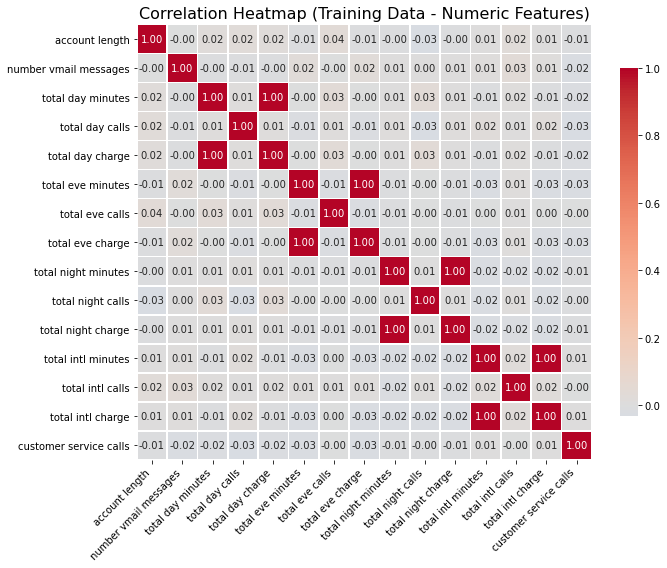

In [379]:
plt.figure(figsize=(10,8))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=True,          # shows correlation values
    fmt=".2f",           # 2 decimal places
    linewidths=0.5,      # grid lines
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Heatmap (Training Data - Numeric Features)", fontsize=16)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



#### Multicollinearity Assessment

The heatmap shows strong positive correlations between several pairs of features.

Notably, usage minutes and their corresponding charge variables exhibit near-perfect correlation (~1.0). 
This indicates linear dependence and potential multicollinearity.

To improve model stability and interpretability, one variable from each highly correlated pair will be removed before fitting the logistic regression model.


In [380]:
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

high_corr_pairs


[('total day charge', 'total day minutes', 0.9999999519905042),
 ('total eve charge', 'total eve minutes', 0.9999997724796893),
 ('total night charge', 'total night minutes', 0.9999991975711221),
 ('total intl charge', 'total intl minutes', 0.9999927568981057)]

In [381]:
X = X.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])


#### Multicollinearity Resolution

Correlation analysis revealed near-perfect linear relationships between usage minutes and corresponding charge variables.

Because charge features are direct linear transformations of minutes, they introduce perfect multicollinearity.

To improve model stability and interpretability, charge variables were removed while retaining usage minutes.


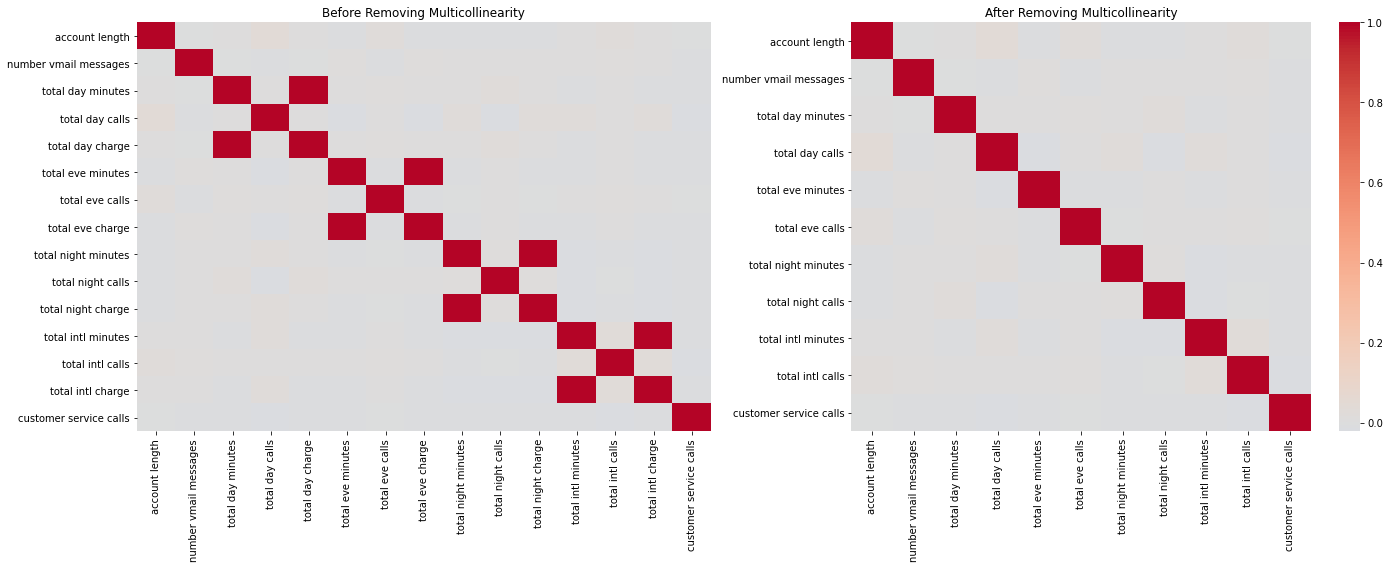

In [400]:
# BEFORE removing charges

numeric_before = X_original.select_dtypes(include=["int64", "float64"])
corr_before = numeric_before.corr()

# AFTER removing charges
X_reduced = X_original.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])

numeric_after = X_reduced.select_dtypes(include=["int64", "float64"])
corr_after = numeric_after.corr()

# Plot side-by-side

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(
    corr_before,
    ax=axes[0],
    cmap="coolwarm",
    center=0,
    annot=False,
    cbar=False
)
axes[0].set_title("Before Removing Multicollinearity")

sns.heatmap(
    corr_after,
    ax=axes[1],
    cmap="coolwarm",
    center=0,
    annot=False
)
axes[1].set_title("After Removing Multicollinearity")

plt.tight_layout()
plt.show()



In [383]:
# splitting data into training and test sets using stratify to ensure the same class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [384]:
# Preprocessing pipeline to standardize numeric features and one-hot encode categorical features
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


In [385]:
# Baseline Logistic Regression model

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)


In [386]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


###     4. Modelling  
### Baseline Logistic Regression

We begin with a baseline Logistic Regression model using default hyperparameters.

Logistic Regression is chosen as a first model because:
- It performs well for linearly separable classification problems.
- It provides probabilistic outputs suitable for ROC-AUC evaluation.


In [387]:
# Baseline Logistic Regression
baseline_log = LogisticRegression(
    max_iter=1000,
    random_state=42
)

baseline_log.fit(X_train_prepared, y_train)

# Predictions
y_test_pred = baseline_log.predict(X_test_prepared)
y_test_proba = baseline_log.predict_proba(X_test_prepared)[:,1]

# Evaluation
print("Baseline Classification Report")
print(classification_report(y_test, y_test_pred))

print("Baseline ROC-AUC:", roc_auc_score(y_test, y_test_proba))



Baseline Classification Report
              precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.55      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667

Baseline ROC-AUC: 0.8178875022608065


### Baseline Logistic Regression Results

The baseline Logistic Regression model achieved an overall accuracy of **86%** and a ROC-AUC of **0.818**, indicating good overall discrimination between churn and non-churn customers.

However, performance differs significantly by class:

- **Non-churn (False class)**: High recall (0.96), meaning the model correctly identifies most customers who will stay.
- **Churn (True class)**: Low recall (0.25), meaning the model misses approximately 75% of customers who actually churn.

This imbalance suggests the model is biased toward predicting the majority class (non-churn). While overall accuracy is strong, churn detection performance needs improvement, particularly recall for the minority class. This motivates further model tuning and class imbalance handling.


In [388]:
# Accuracy on training and test sets to check for overfitting
print("Train Accuracy:", accuracy_score(y_train, baseline_log.predict(X_train_prepared)))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.8619654913728432
Test Accuracy: 0.8605697151424287


### Weighted Logistic Regression

Because churn prediction involves class imbalance, we adjust the model to penalize misclassification of churn customers more heavily.


In [389]:
log_weighted = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_weighted.fit(X_train_prepared, y_train)

y_test_pred_weighted = log_weighted.predict(X_test_prepared)
y_test_proba_weighted = log_weighted.predict_proba(X_test_prepared)[:,1]

print("Weighted Classification Report")
print(classification_report(y_test, y_test_pred_weighted))

print("Weighted ROC-AUC:", roc_auc_score(y_test, y_test_proba_weighted))


Weighted Classification Report
              precision    recall  f1-score   support

       False       0.95      0.76      0.84       570
        True       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Weighted ROC-AUC: 0.8154096581660336


### Hyperparameter Tuning

We tune regularization strength (C) and class_weight using 5-fold cross-validation.  
ROC-AUC is used as the primary scoring metric.


In [390]:

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "class_weight": [None, "balanced"],
    "penalty": ["l2"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, solver="liblinear"),
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train_prepared, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV ROC-AUC:", grid.best_score_)


Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Best CV ROC-AUC: 0.8193411851306589


In [391]:
best_log = grid.best_estimator_

y_test_pred_best = best_log.predict(X_test_prepared)
y_test_proba_best = best_log.predict_proba(X_test_prepared)[:,1]

print("Final Tuned Model")
print(classification_report(y_test, y_test_pred_best))
print("Final ROC-AUC:", roc_auc_score(y_test, y_test_proba_best))


Final Tuned Model
              precision    recall  f1-score   support

       False       0.95      0.76      0.84       570
        True       0.34      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Final ROC-AUC: 0.8149032374751312


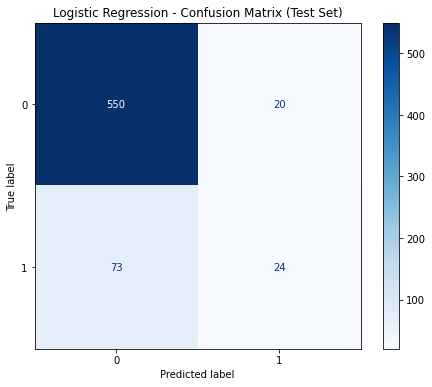

In [401]:
cm_log = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot(ax=ax, cmap="Blues")
ax.set_title("Logistic Regression - Confusion Matrix (Test Set)")
plt.show()


The confusion matrix shows how well the model distinguishes between churners (1) and non-churners (0).

True Negatives (550): Correctly predicted non-churn customers.

False Positives (20): Non-churn customers incorrectly predicted as churn.

False Negatives (73): Churn customers incorrectly predicted as non-churn.

True Positives (24): Correctly identified churn customers.

The model performs very well at identifying non-churn customers but struggles to correctly detect churners, as shown by the higher number of false negatives. This indicates that while overall accuracy is strong, recall for the churn class remains limited — an important consideration for customer retention strategy.

### Logistic Regression Coefficient Interpretation

Coefficients represent changes in log-odds of churn.

Positive values increase churn probability.  
Negative values decrease churn probability.


In [392]:
# Get numeric feature names
num_features = numeric_features

# Get categorical feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_["cat"]
cat_features = cat_encoder.get_feature_names(categorical_features)

# Combine them
feature_names = list(num_features) + list(cat_features)

coefficients = pd.Series(
    best_log.coef_[0],
    index=feature_names
).sort_values(key=np.abs, ascending=False)

coefficients.head(15)



international plan_yes    2.362872
voice mail plan_yes      -2.180074
customer service calls    0.818259
total day minutes         0.667829
number vmail messages     0.622693
total eve minutes         0.347856
total intl minutes        0.196530
total intl calls         -0.174423
total night minutes       0.117021
total eve calls           0.077484
account length            0.074699
total day calls           0.051696
total night calls         0.002106
dtype: float64

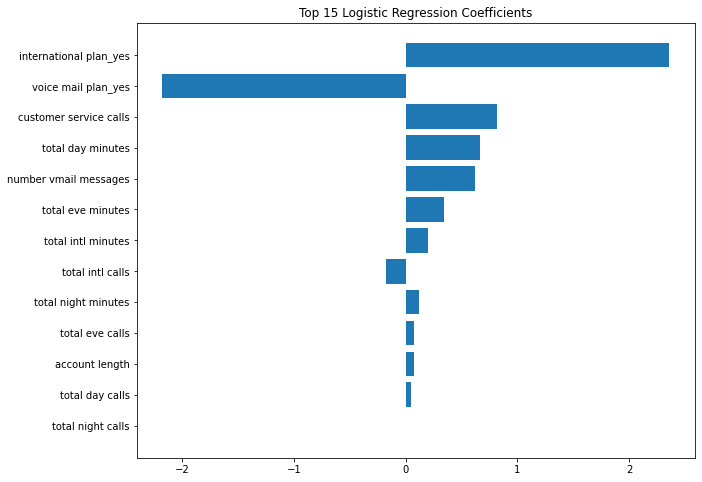

In [393]:
top_features = coefficients.head(15)

plt.figure(figsize=(10,8))
plt.barh(top_features.index, top_features.values)
plt.gca().invert_yaxis()
plt.title("Top 15 Logistic Regression Coefficients")
plt.show()


### Logistic Regression Coefficient Interpretation

The coefficients represent the change in log-odds of churn associated with a one-unit increase in each feature (after scaling).

- **Positive coefficients** increase the likelihood of churn.
- **Negative coefficients** decrease the likelihood of churn.
- Larger absolute values indicate stronger influence on churn prediction.

Key observations:
- Customers with an **international plan** show a strong positive association with churn.
- Higher **customer service calls** are positively associated with churn, suggesting dissatisfaction may drive churn.
- Increased **total day minutes** and **international minutes** are also positively related to churn.
- Having a **voice mail plan** appears negatively associated with churn, potentially indicating higher customer engagement or satisfaction.

These insights help identify behavioral patterns that distinguish churn-prone customers from those likely to stay.


## Model 2 - Decision Tree Classifier  
Decision Trees was included as a second model to explore non-linear relationships and interaction effects between features.

Unlike Logistic Regression, which assumes a linear relationship between features and the log-odds of churn, Decision Trees:
- Capture complex, non-linear decision boundaries.
- Automatically model feature interactions.
- Are easy to interpret visually.

Including a Decision Tree allows us to compare a linear model (Logistic Regression) with a non-linear model and evaluate whether modeling flexibility improves churn detection performance.


In [394]:

# Baseline Decision Tree
tree = DecisionTreeClassifier(
    random_state=42
)

tree.fit(X_train_prepared, y_train)

# Predictions
y_test_pred_tree = tree.predict(X_test_prepared)
y_test_proba_tree = tree.predict_proba(X_test_prepared)[:,1]

# Evaluation
print("Decision Tree Classification Report")
print(classification_report(y_test, y_test_pred_tree))

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_test_proba_tree))


Decision Tree Classification Report
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       570
        True       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667

Decision Tree ROC-AUC: 0.7907487791644059


The Decision Tree achieved an overall accuracy of **91%**, with strong performance on the non-churn class (recall = 0.95). 

Importantly, churn detection improved compared to Logistic Regression:
- **Churn recall = 0.63**, meaning the model correctly identifies 63% of customers who will churn.
- **Churn precision = 0.69**, indicating reasonable confidence in churn predictions.

However, the ROC-AUC of **0.79** is slightly lower than the Logistic Regression model, suggesting slightly weaker overall ranking ability.

Overall, the Decision Tree improves churn recall but trades off some probability discrimination performance.


In [395]:
print("Train Accuracy:", accuracy_score(y_train, tree.predict(X_train_prepared)))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_tree))


Train Accuracy: 1.0
Test Accuracy: 0.9055472263868066


The Decision Tree achieved **100% training accuracy**, but **~90.6% test accuracy**.

This suggests the baseline tree is overfitting the training data.  
The model memorizes training patterns rather than learning generalizable rules, which motivates hyperparameter tuning to control model complexity.


### Hyperparameter Tuning Strategy

To reduce overfitting, we tuned key Decision Tree parameters:

- **max_depth**: Limits how deep the tree can grow (controls complexity).
- **min_samples_split**: Minimum samples required to split a node.
- **min_samples_leaf**: Minimum samples required at a leaf node.

These parameters help regularize the model and improve generalization performance.


### Cross-Validation Setup

We used **GridSearchCV with 5-fold cross-validation**, optimizing for **ROC-AUC**.

ROC-AUC was selected because it measures the model’s ability to rank churn vs non-churn customers across probability thresholds, making it more robust than accuracy in imbalanced classification settings.


In [396]:
param_grid_tree = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid_tree.fit(X_train_prepared, y_train)

print("Best Parameters:", grid_tree.best_params_)
print("Best CV ROC-AUC:", grid_tree.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV ROC-AUC: 0.8935123356175987


### The optimal hyperparameters were:

- **max_depth = 5**
- **min_samples_split = 10**
- **min_samples_leaf = 1**

The best cross-validated ROC-AUC score was **0.8935**, indicating strong discrimination ability after controlling model complexity.

This confirms that tuning improved generalization compared to the baseline Decision Tree.


In [408]:
print("Tuned Decision Tree Classification Report")
print(classification_report(y_test, y_test_pred_tree))

print("Tuned Decision Tree ROC-AUC:",
      roc_auc_score(y_test, y_test_proba_tree))


Tuned Decision Tree Classification Report
              precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.76      0.64      0.69        97

    accuracy                           0.92       667
   macro avg       0.85      0.80      0.82       667
weighted avg       0.91      0.92      0.91       667

Tuned Decision Tree ROC-AUC: 0.803734852595406


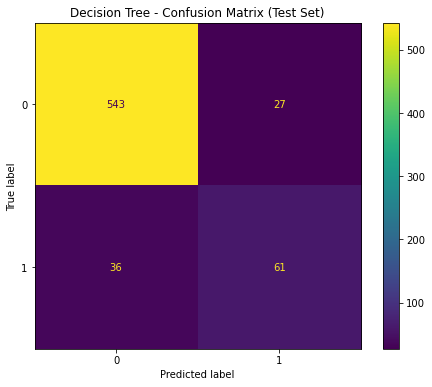

In [397]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred_tree)

fig, ax = plt.subplots(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
ax.set_title("Decision Tree - Confusion Matrix (Test Set)")
plt.show()


The confusion matrix shows the model’s performance on the test set:

- **543 True Negatives**: Customers correctly predicted to stay.
- **61 True Positives**: Customers correctly identified as churn.
- **27 False Positives**: Customers incorrectly predicted to churn.
- **36 False Negatives**: Customers who churned but were missed.

The model demonstrates strong performance in identifying non-churn customers while significantly improving churn detection compared to the baseline Logistic Regression. However, 36 churn cases were still missed, indicating room for improvement in recall optimization.


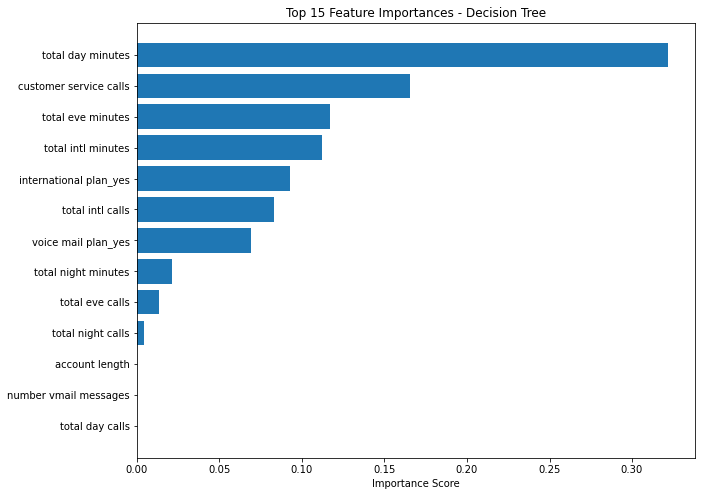

In [398]:
# Feature importance for Decision Tree

feature_importances = pd.Series(
    grid_tree.best_estimator_.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

top_features = feature_importances.head(15)

plt.figure(figsize=(10,8))
plt.barh(top_features.index[::-1], top_features.values[::-1])
plt.title("Top 15 Feature Importances - Decision Tree")
plt.xlabel("Importance Score")
plt.show()


The feature importance plot shows which variables contributed most to the model’s churn predictions.

- **Total day minutes** is the strongest predictor of churn.
- **Customer service calls** is highly influential, suggesting service-related dissatisfaction plays a key role.
- **Total evening and international usage** also contribute meaningfully to churn risk.
- Plan-related variables such as **international plan** and **voice mail plan** have moderate influence.

These results indicate that high usage patterns and frequent customer service interactions are strong indicators of churn risk. This insight can guide targeted retention strategies.


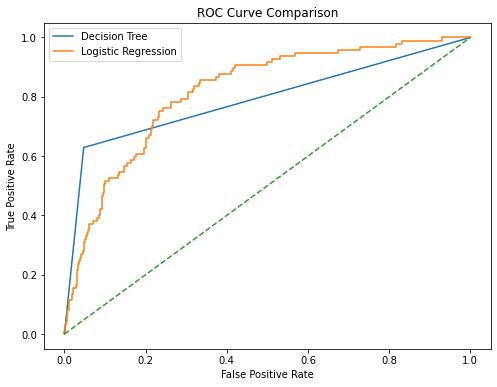

In [399]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_test_proba_tree)
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## 5. Evaluation

In [404]:
# Tuned Logistic
best_log = grid.best_estimator_
y_test_proba_log = best_log.predict_proba(X_test_prepared)[:,1]
y_test_pred_log = best_log.predict(X_test_prepared)

# Tuned Decision Tree
best_tree = grid_tree.best_estimator_
y_test_proba_tree = best_tree.predict_proba(X_test_prepared)[:,1]
y_test_pred_tree = best_tree.predict(X_test_prepared)


In [405]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Tuned Logistic Regression", "Tuned Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_test_pred_log),
        accuracy_score(y_test, y_test_pred_tree)
    ],
    "Precision (Churn)": [
        precision_score(y_test, y_test_pred_log),
        precision_score(y_test, y_test_pred_tree)
    ],
    "Recall (Churn)": [
        recall_score(y_test, y_test_pred_log),
        recall_score(y_test, y_test_pred_tree)
    ],
    "F1 Score (Churn)": [
        f1_score(y_test, y_test_pred_log),
        f1_score(y_test, y_test_pred_tree)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_test_proba_log),
        roc_auc_score(y_test, y_test_proba_tree)
    ]
})

comparison


,Model,Accuracy,Precision (Churn),Recall (Churn),F1 Score (Churn),ROC-AUC
0,Tuned Logistic Regression,0.757121,0.344498,0.742268,0.470588,0.814903
1,Tuned Decision Tree,0.917541,0.756098,0.639175,0.692737,0.803735


The Decision Tree achieves significantly higher overall accuracy (91.7%) and much higher precision for churn (75.6%), meaning when it predicts churn, it is usually correct.

The Logistic Regression achieves higher recall for churn (74.2%), meaning it identifies more actual churners.

The Decision Tree has a stronger F1-score (0.693 vs 0.471), indicating a better balance between precision and recall.

Logistic Regression slightly outperforms the Decision Tree in ROC-AUC (0.815 vs 0.804), suggesting marginally better probability discrimination overall.

### Interpretation in Business Context

If the goal is to reduce false alarms and target high-confidence churners, the Decision Tree performs better.

If the goal is to catch as many churners as possible, even at the cost of more false positives, Logistic Regression performs better.

The Decision Tree provides a stronger overall balance between precision and recall, making it more practical for targeted retention campaigns.

## 6. Conclusion

This project developed and compared two classification models to predict customer churn at SyriaTel.

After resolving multicollinearity and performing hyperparameter tuning:

The Tuned Decision Tree achieved the highest accuracy and F1-score.

The Tuned Logistic Regression achieved slightly better ROC-AUC and higher recall for churn.

Given the business objective of identifying high-risk customers while minimizing unnecessary retention costs, the Tuned Decision Tree is selected as the final model due to its strong precision, high accuracy, and better balance between recall and precision.

### Business Recommendations

Prioritize customers identified as high churn risk by the Decision Tree for retention interventions.

Focus on key drivers such as:

*Total day minutes usage*

*Customer service calls*

*International plan usage*

Monitor recall levels continuously to ensure churners are not being missed.

Consider ensemble methods (e.g., Random Forest) in future iterations to further improve predictive performance.